# Librerías

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, BallTree, KDTree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import math as math

# Preprocesamiento

In [2]:
# Importamos el dataset que trabajamos en el checkpoint 2 con las varibles categóricas como dummies
reservas = pd.read_csv('/content/sample_data/reservas_dummies.csv')

# Importamos el dataset de test con las variables categóricas como dummies
test = pd.read_csv('/content/sample_data/test_dummies.csv')

In [3]:
# Droppeamos el id para poder entrenar y predecir
ids_train = reservas["id"]
ids_test = test["id"]
reservas.drop(columns="id", inplace=True)
test.drop(columns="id", inplace=True)

# Ordenamos las columnas
reservas = reservas.reindex(sorted(reservas.columns), axis=1)
test = test.reindex(sorted(test.columns), axis=1)

# Imputamos datos faltantes
test['agent'] = test['agent'].fillna(-1)
test['company'] = test['company'].fillna(-1)

# KNN classifier

In [4]:
a = reservas.drop(['is_canceled'], axis=1)
b = reservas['is_canceled']

x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.20, random_state=0)

## Con parámetros default

In [5]:
#Crear el modelo
KNN_Classifier = KNeighborsClassifier()

#Vemos sus parámetros
KNN_Classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [6]:
#Entrenar el modelo
KNN_Classifier.fit(x_train, y_train)

#Predicción sobre test
y_pred = KNN_Classifier.predict(x_test)

In [7]:
#Cantidad de aciertos
print('correctas: ', np.sum(y_test == y_pred))
print('total: ', len(y_test))

correctas:  8703
total:  11718


Text(50.722222222222214, 0.5, 'True')

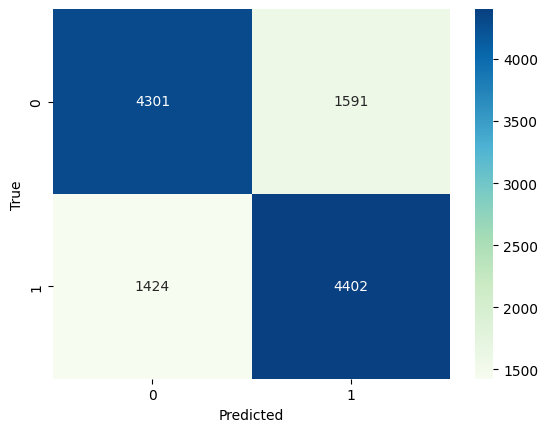

In [8]:
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

### Métricas

In [9]:
accuracy_score(y_test,y_pred)

0.7427035330261137

### Predicción sobre test

In [10]:
y_pred = KNN_Classifier.predict(test)
prediccion = pd.DataFrame({"id": ids_test, "is_canceled": y_pred})

In [11]:
prediccion.to_csv('/content/sample_data/prediccion_knn.csv', index = False)

## Con parámetros optimizados

In [12]:
#Métricas Válidas
VALID_METRICS = dict(
    ball_tree=BallTree.valid_metrics,
    kd_tree=KDTree.valid_metrics,
    # The following list comes from the sklearn.metrics.pairwise doc string
    brute=list(PAIRWISE_DISTANCE_FUNCTIONS.keys())
    + [ 'braycurtis','canberra','chebyshev','correlation',
        'cosine','dice','hamming','jaccard','kulsinski',
        'mahalanobis','matching','minkowski','rogerstanimoto',
        'russellrao','seuclidean','sokalmichener','sokalsneath',
        'sqeuclidean','yule','wminkowski',
    ],
)

#Ejemplo
for alg in VALID_METRICS:
    print(f'algoritmo: {alg}')
    print(VALID_METRICS[alg])
    print()

algoritmo: ball_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity', 'seuclidean', 'mahalanobis', 'wminkowski', 'hamming', 'canberra', 'braycurtis', 'matching', 'jaccard', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'haversine', 'pyfunc']

algoritmo: kd_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity']

algoritmo: brute
['cityblock', 'cosine', 'euclidean', 'haversine', 'l2', 'l1', 'manhattan', 'precomputed', 'nan_euclidean', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski']



In [13]:
#Grilla de Parámetros
params_grid = {'n_neighbors':range(1,30),

               'algorithm':['ball_tree', 'kd_tree', 'brute'],
               'metric':['euclidean','manhattan','chebyshev']
              }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='f1', n_iter=10, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

KeyboardInterrupt: ignored

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

### Métricas

In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
accuracy_score(y_test,y_pred)

In [ ]:
#Reporte de Clasificación
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

### Predicción sobre test

In [ ]:
y_pred = best_knn.predict(test)
prediccion = pd.DataFrame({"id": ids_test, "is_canceled": y_pred})

In [ ]:
prediccion.to_csv('/content/sample_data/prediccion_knn_opt.csv', index = False)

# Random Forest

## Con parametros default

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_train_forest, x_test_forest, y_train_forest, y_test_forest = train_test_split(a, b, test_size=0.20, random_state=0)

In [ ]:
random_forest = RandomForestClassifier()

random_forest.get_params()

In [ ]:
#Entrenar el modelo
random_forest.fit(x_train_forest, y_train_forest)

#Predicción sobre test
y_pred_forest = random_forest.predict(x_test_forest)

In [ ]:
#Cantidad de aciertos
print('correctas: ', np.sum(y_test_forest == y_pred_forest))
print('total: ', len(y_test_forest))

In [ ]:
tabla=confusion_matrix(y_test_forest, y_pred_forest)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

### Métricas

In [ ]:
accuracy_score(y_test,y_pred_forest)

### Predicción sobre test

In [ ]:
y_pred_forest = random_forest.predict(test)
prediccion = pd.DataFrame({"id": ids_test, "is_canceled": y_pred_forest})

In [ ]:
prediccion.to_csv('/content/sample_data/prediccion_random_forest.csv', index = False)

## Con Parametros Optimizados

In [28]:
x_train_forest_opt, x_test_forest_opt, y_train_forest_opt, y_test_forest_opt = train_test_split(a, b, test_size=0.20, random_state=0)

param_grid = {
    'bootstrap': [True, False],
    'ccp_alpha': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [10, 50, 100, 200],
    'random_state': [None, 42],  # Cambia 42 por cualquier valor que desees usar como semilla aleatoria
}

rf_classifier = RandomForestClassifier()


#Random Search con 10 Folds y 10 iteraciones
rand_rf = RandomizedSearchCV(rf_classifier, param_grid, cv=5, scoring='f1', n_iter=10, random_state=5)

rand_rf.fit(x_train_forest_opt, y_train_forest_opt)
rand_rf.cv_results_['mean_test_score']

array([0.49103559, 0.85171051, 0.47879355, 0.47879355, 0.47879355,
       0.83971252, 0.        , 0.        , 0.84001367, 0.80643695])

In [29]:
#Mejores hiperparametros
print(rand_rf.best_params_)
#Mejor métrica
print(rand_rf.best_score_)

{'random_state': None, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy', 'class_weight': 'balanced', 'ccp_alpha': 0.0, 'bootstrap': True}
0.8517105077050919


### Métricas

In [31]:
#Mejor estimador
best_random_forest = rand_rf.best_estimator_

#Predicción con mejor estimador
y_pred_random_f = best_random_forest.predict(x_test_forest_opt)

#Accuracy test
accuracy_score(y_test_forest_opt,y_pred_random_f)

0.8655913978494624

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      5892
           1       0.88      0.85      0.86      5826

    accuracy                           0.87     11718
   macro avg       0.87      0.87      0.87     11718
weighted avg       0.87      0.87      0.87     11718



Text(50.722222222222214, 0.5, 'True')

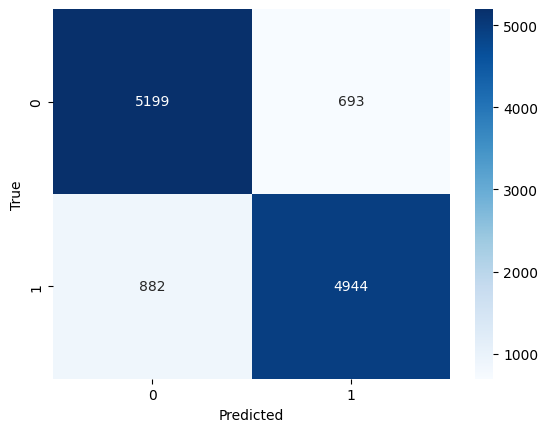

In [32]:
#Reporte de Clasificación
print(classification_report(y_test_forest_opt,y_pred_random_f))

#Matriz de Confusión
cm = confusion_matrix(y_test_forest_opt,y_pred_random_f)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
x_train_forest_opt_2, x_test_forest_opt_2, y_train_forest_opt_2, y_test_forest_opt_2 = train_test_split(a, b, test_size=0.20, random_state=0)

param_grid = {
    'bootstrap': [True],
    'ccp_alpha': [0.0],
    'class_weight': ['balanced'],
    'criterion': ['entropy'],
    'max_depth': [30],
    'max_features': ['log2'],
    'min_samples_leaf': [1],
    'min_samples_split': [10],
    'n_estimators': [200],
    'random_state': [42],
}

rf_classifier = RandomForestClassifier()

for k in range(2,15):

  rand_rf = RandomizedSearchCV(rf_classifier, param_grid, cv=k, scoring='f1', n_iter=10, random_state=5)

  rand_rf.fit(x_train_forest_opt_2, y_train_forest_opt_2)


  print("Fold:",k," Score:",rand_rf.best_score_)


Con 9 folds se da el mejor Score: 0.8537544308412363

In [33]:
x_train_forest_opt_2, x_test_forest_opt_2, y_train_forest_opt_2, y_test_forest_opt_2 = train_test_split(a, b, test_size=0.20, random_state=0)


rf_classifier = RandomForestClassifier(criterion="entropy", max_depth = None, min_samples_leaf =  1,
                                         min_samples_split = 10,class_weight = "balanced", ccp_alpha = 0.0,
                                         max_features = "log2", n_estimators = 200, random_state = 42)

rf_classifier.fit(x_train_forest_opt_2, y_train_forest_opt_2)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='log2', min_samples_split=10,
                       n_estimators=200, random_state=42)

### Métricas

In [40]:
#Predicción con mejor estimador
y_pred_random_f = rf_classifier.predict(x_test_forest_opt_2)

#Accuracy test
accuracy_score(y_test_forest_opt_2,y_pred_random_f)

0.8680662229049326

In [42]:
y_pred_random = rf_classifier.predict(x_test_forest_opt_2)

accuracy = accuracy_score(y_test_forest_opt_2, y_pred_random)
precision = precision_score(y_test_forest_opt_2, y_pred_random)
recall = recall_score(y_test_forest_opt_2, y_pred_random)
f1 = f1_score(y_test_forest_opt_2, y_pred_random)
roc_auc = roc_auc_score(y_test_forest_opt_2, y_pred_random)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Exactitud: 0.8680662229049326
Precisión: 0.8778248587570622
Recuperación: 0.8534157226227257
F1-Score: 0.8654482158398608
AUC-ROC: 0.8679841681681177


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      5892
           1       0.88      0.85      0.87      5826

    accuracy                           0.87     11718
   macro avg       0.87      0.87      0.87     11718
weighted avg       0.87      0.87      0.87     11718



Text(50.722222222222214, 0.5, 'True')

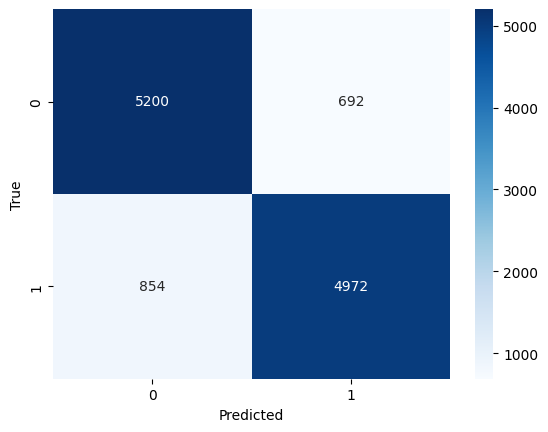

In [41]:
#Reporte de Clasificación
print(classification_report(y_test_forest_opt_2,y_pred_random_f))

#Matriz de Confusión
cm = confusion_matrix(y_test_forest_opt_2,y_pred_random_f)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [43]:
y_pred = rf_classifier.predict(test)
prediccion = pd.DataFrame({"id": ids_test, "is_canceled": y_pred})

In [44]:
prediccion.to_csv('/content/sample_data/prediccion_random_forest_optimizado.csv', index = False)

## Hacemos Normalizacion y Balanceo

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [15]:
b.value_counts()

0    29484
1    29105
Name: is_canceled, dtype: int64

In [16]:
# Normalización Min-Max en los datos de entrenamiento
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(a)

In [17]:
# Balanceo de clases
class_0 = X_train_normalized[b == 0]
class_1 = X_train_normalized[b == 1]

In [18]:
# Balanceo de clases (sobremuestreo de la clase minoritaria)

# Selecciona los ejemplos de la clase mayoritaria (clase "0")
class_0 = X_train_normalized[b == 0]

# Selecciona los ejemplos de la clase minoritaria (clase "1")
class_1 = X_train_normalized[b == 1]

# Realiza sobremuestreo de la clase minoritaria (clase "1")
# - replace=True: Permite muestrear con reemplazo
# - n_samples=len(class_0): Genera tantas muestras de la clase "1" como ejemplos de la clase "0"
class_0_oversampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)

# Combina los datos equilibrados en X_train_balanced y y_train_balanced
# - np.vstack: Apila verticalmente los arrays
# - np.hstack: Concatena horizontalmente los arrays
X_train_balanced = np.vstack((class_0, class_0_oversampled))
y_train_balanced = np.hstack((b[b == 0], np.ones(len(class_0))))

In [21]:
x_train_forest_bal, x_test_forest_bal, y_train_forest_bal, y_test_forest_bal = train_test_split(a, b, test_size=0.20, random_state=0)


rf_classifier_bal = RandomForestClassifier(criterion="entropy", max_depth = None, min_samples_leaf =  1,
                                         min_samples_split = 10,class_weight = "balanced", ccp_alpha = 0.0,
                                         max_features = "log2", n_estimators = 200, random_state = 42)

rf_classifier_bal.fit(x_train_forest_bal, y_train_forest_bal)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='log2', min_samples_split=10,
                       n_estimators=200, random_state=42)

In [24]:
y_pred_bal = rf_classifier_bal.predict(x_test_forest_bal)

accuracy = accuracy_score(y_test_forest_bal, y_pred_bal)
precision = precision_score(y_test_forest_bal, y_pred_bal)
recall = recall_score(y_test_forest_bal, y_pred_bal)
f1 = f1_score(y_test_forest_bal, y_pred_bal)
roc_auc = roc_auc_score(y_test_forest_bal, y_pred_bal)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Exactitud: 0.8680662229049326
Precisión: 0.8778248587570622
Recuperación: 0.8534157226227257
F1-Score: 0.8654482158398608
AUC-ROC: 0.8679841681681177


Text(50.722222222222214, 0.5, 'True')

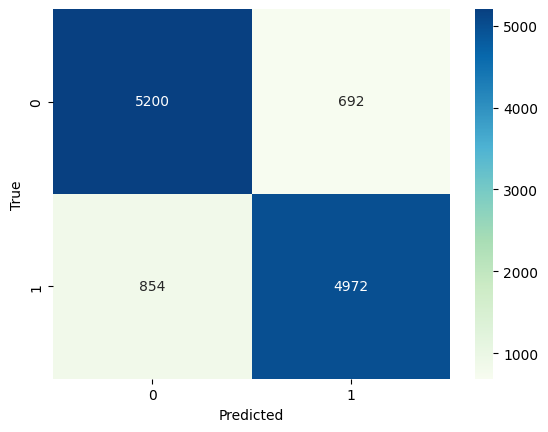

In [25]:
from sklearn.metrics import confusion_matrix
tabla=confusion_matrix(y_test_forest_bal, y_pred_bal)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [26]:
y_pred = rf_classifier_bal.predict(test)
prediccion = pd.DataFrame({"id": ids_test, "is_canceled": y_pred})

In [27]:
prediccion.to_csv('/content/sample_data/prediccion_random_forest_balanceado_normalizado.csv', index = False)